In [66]:
#Titanic Survival Analysis: Exploratory Data Analysis (EDA)

In [72]:
"""
Overview:
This project explores the famous Titanic dataset to uncover insights about passenger survival rates. 

Key Objectives:
- Perform data cleaning and exploration.
- Visualize data to answer key questions regarding survival factors.

Factors Influenced:
- Gender
- Age
- Passenger class
"""

'\nOverview:\nThis project explores the famous Titanic dataset to uncover insights about passenger survival rates. \n\nKey Objectives:\n- Perform data cleaning and exploration.\n- Visualize data to answer key questions regarding survival factors.\n\nFactors Influenced:\n- Gender\n- Age\n- Passenger class\n'

In [55]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
df['age'].fillna(df['age'].median(), inplace=True)

df.dropna(subset=['embarked'], inplace=True)


C:\Users\siddharth\AppData\Local\Temp\ipykernel_2496\2265635916.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [26]:
survival_rate = df['survived'].mean()
print(f"Overall Survival Rate: {survival_rate * 100:.2f}%")


Overall Survival Rate: 38.25%


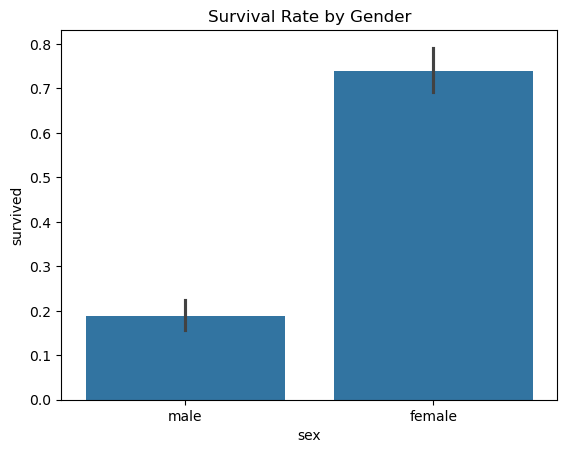

In [28]:
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


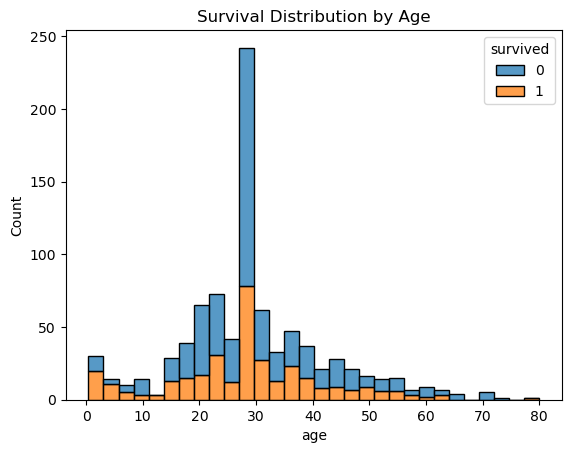

In [30]:
sns.histplot(df, x='age', hue='survived', multiple='stack', kde=False)
plt.title('Survival Distribution by Age')
plt.show()


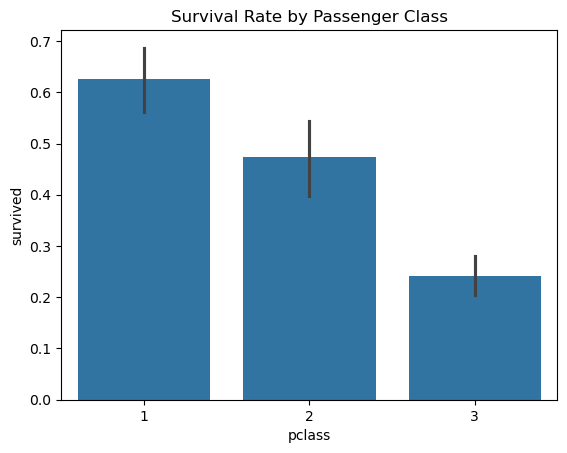

In [32]:
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


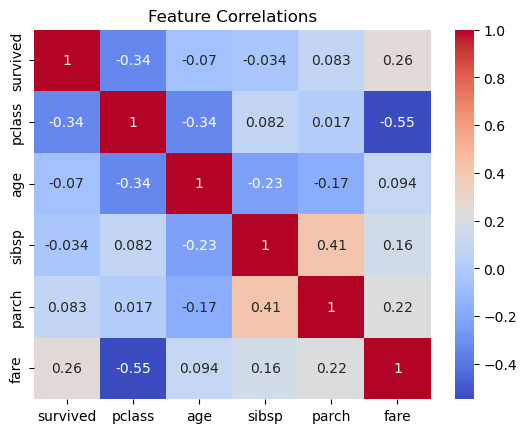

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


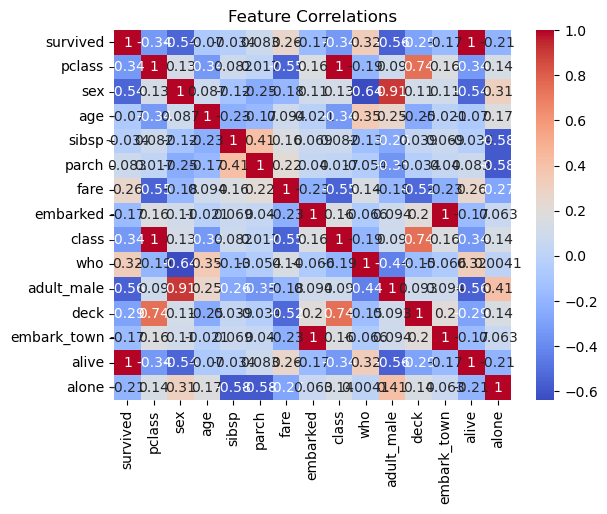

In [40]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns if needed
for col in df.select_dtypes(include=['object', 'category']):
    df[col] = LabelEncoder().fit_transform(df[col])

# Proceed with correlation and plotting
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


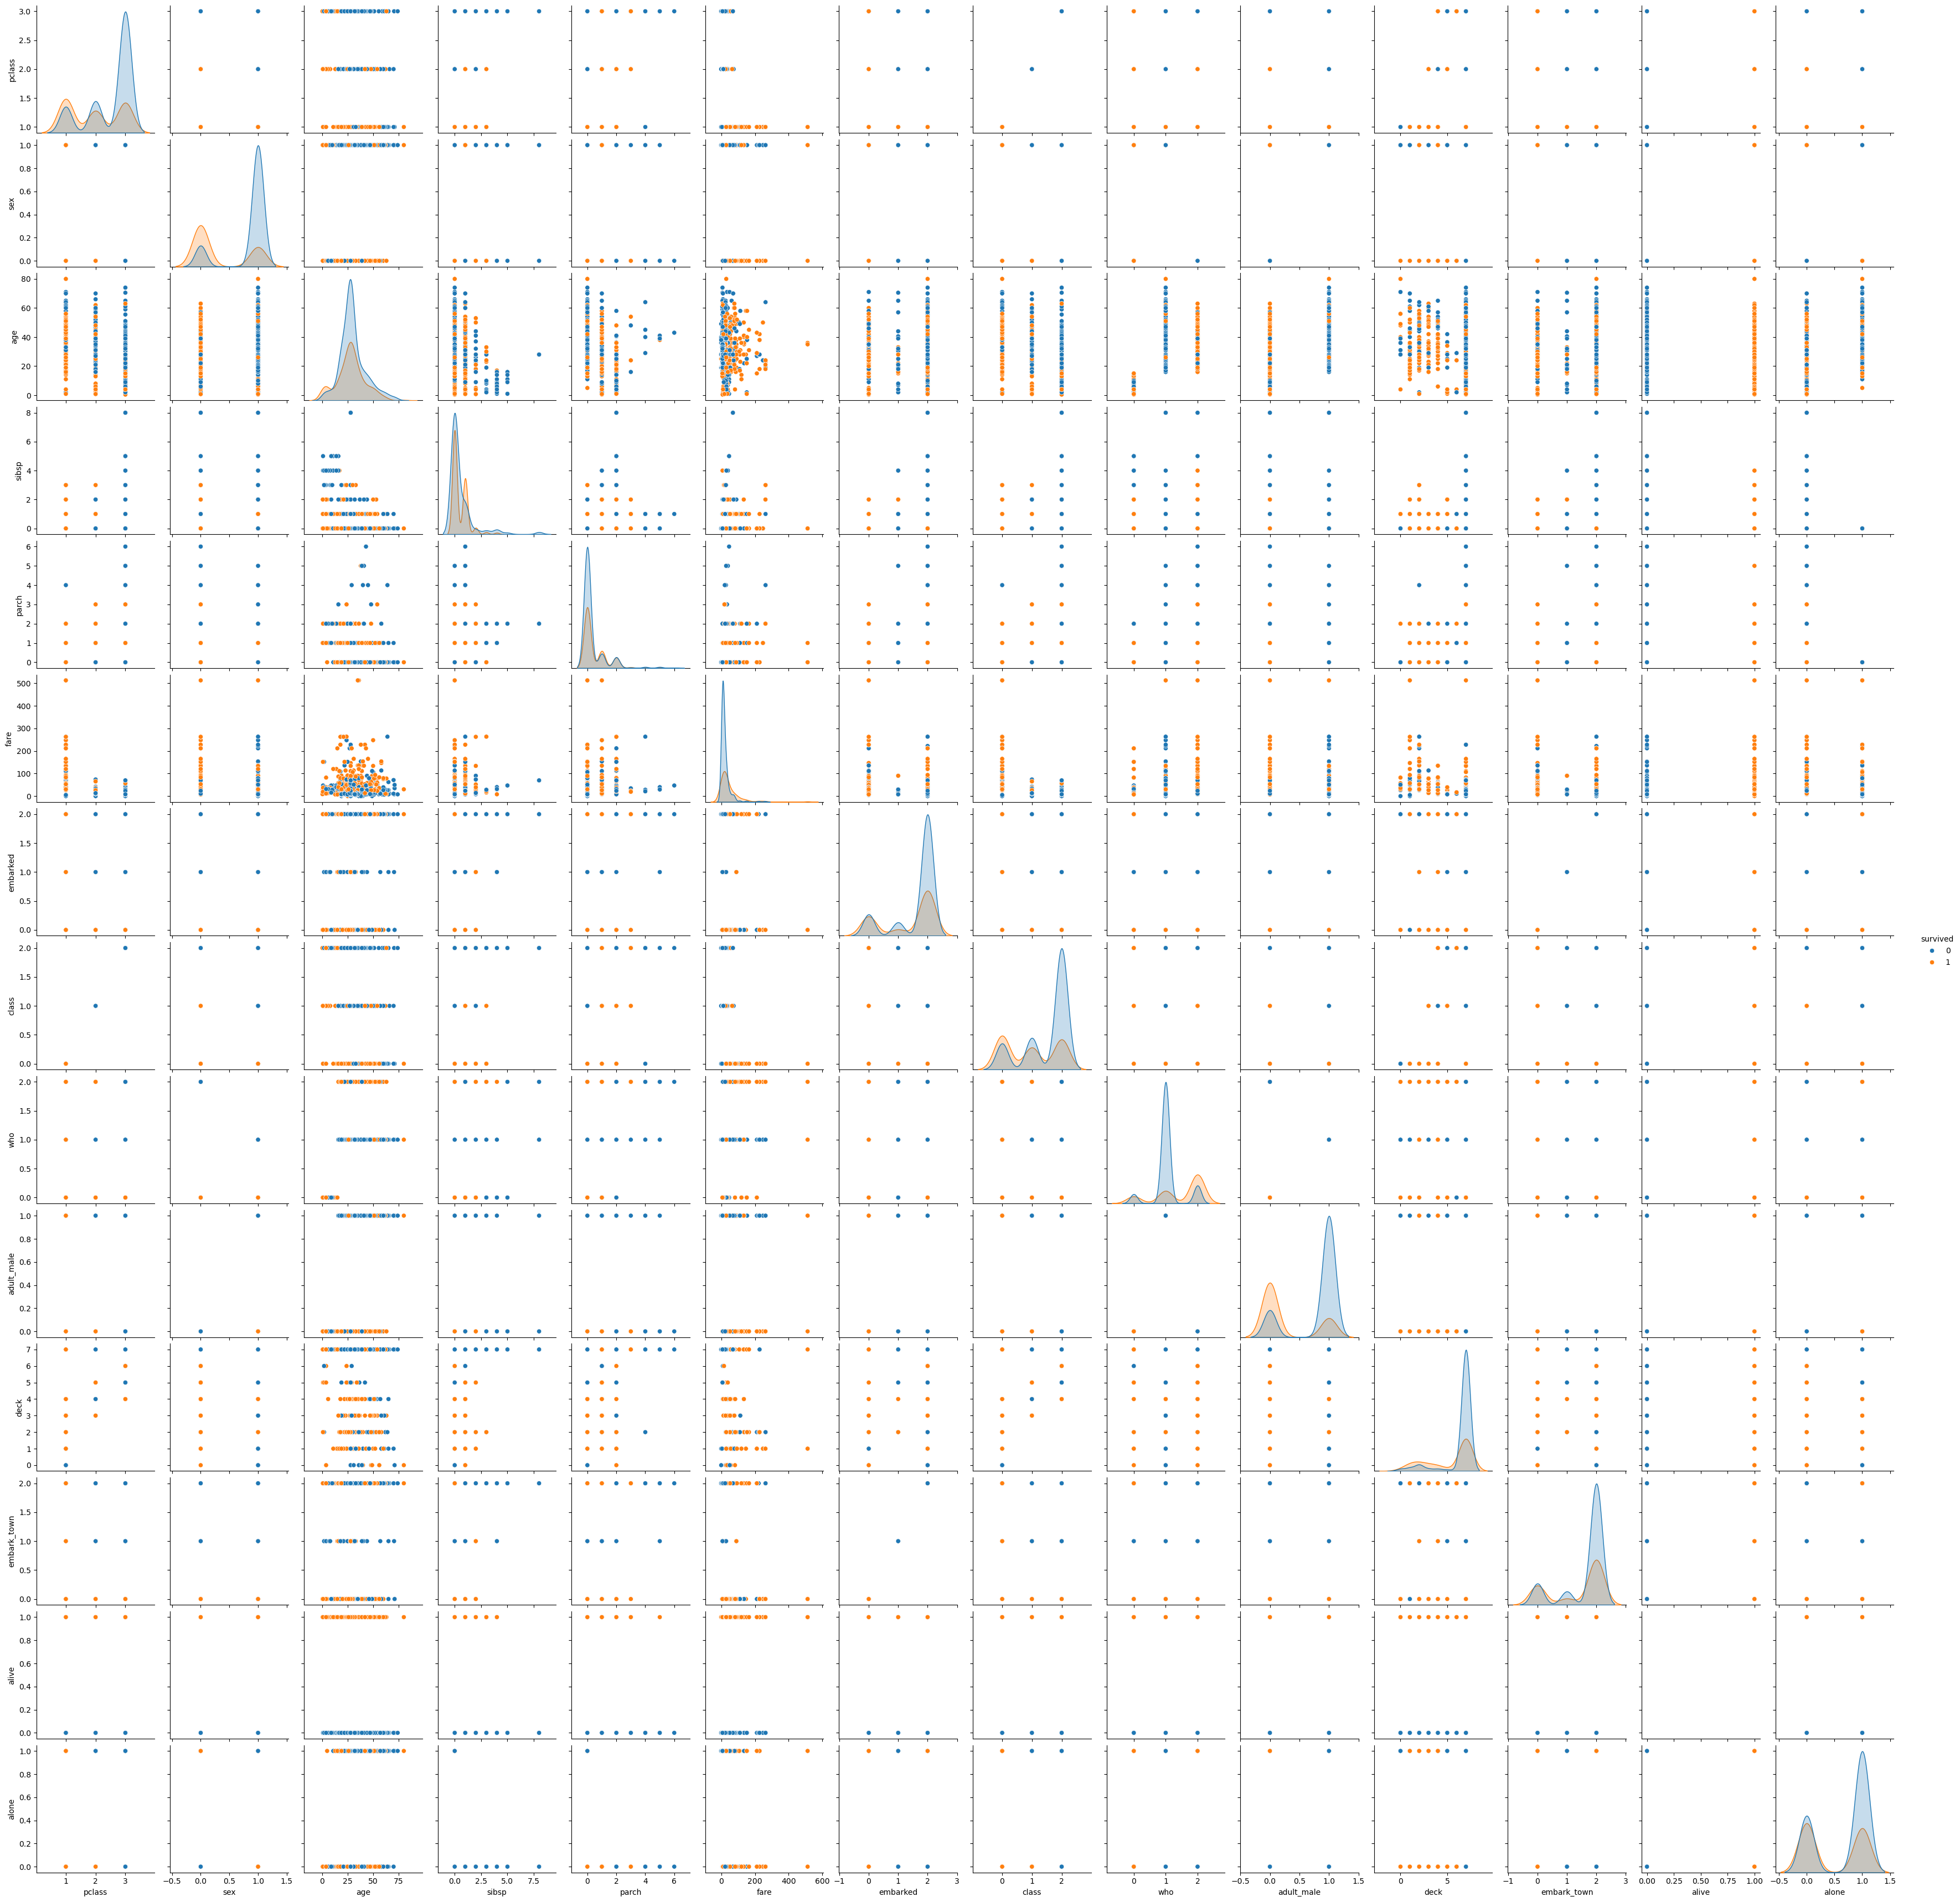

In [53]:
sns.pairplot(df, hue='survived')
plt.show()